In [1]:
using Plots
using Random

In [121]:
function single_step!(xs, v, σ, k)
    max_x = maximum(xs)
    xs .+= v .+ σ .* randn(length(xs)) .+ k .* (max_x .- xs)
    return xs
end

function multi_step!(xs0, v, σ, k, t)
    result = Array{Float64}(undef, length(xs0),t)

    for i=1:t
        single_step!(xs0, v, σ, k)
        
        for j in 1:length(xs0)
            result[j,i] = xs0[j]
        end
    end

    return result
end

multi_step! (generic function with 1 method)

In [150]:
result = multi_step!([0.0; 0.0], 0.3, 1.0, 0.3, 10000)

2×10000 Matrix{Float64}:
 -0.790736  -0.617761  0.546908  …  5361.04  5360.54  5359.85  5361.7
  0.194313   1.50601   2.39533      5359.45  5360.93  5361.92  5362.68

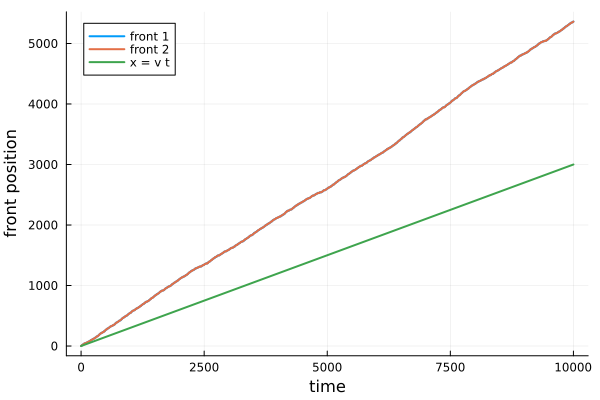

In [152]:
p = plot(;xlabel="time", ylabel="front position")
for i =1:size(result,1)
    plot!(p, result[i,:], lw=2, label = "front $(i)")
end
plot!(0.3 * (1:size(result,2)), lw=2, label="x = v t")

In [114]:
xs = [0.0, 0.0]

single_step!(xs, 0.1, 0.1, 0.0)

2-element Vector{Float64}:
 -0.10993912227849842
  0.2540109177217683